# Function Transformer
In this topic we are discussing how function transformer is useful to improve linearity in data distribution. <br>
FunctionTransformer is a class in scikit learn library which uses different strategies to improve data distribution. Most famous one is log transform (__np.log1p__) <br>    
We will use two scikit learn library algorithms __LogisticRegression()__ and __DecisionTreeClassifier()__ to check the effect of data transormation on these two algorithm. We can observe if the transormation is at all effecting any of these algorithms. <br>
In the end the end you will learn how to use reciprocal, square, squareroot transform using FunctionTransformer().

In [184]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [185]:
titanic = pd.read_csv('./Datasets/train.csv', usecols=['Age', 'Fare', 'Survived'])

In [186]:
# imputing null values with mean of the column
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [187]:
titanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [188]:
# splitting
X = titanic.iloc[:, 1:3]
y = titanic.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [189]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


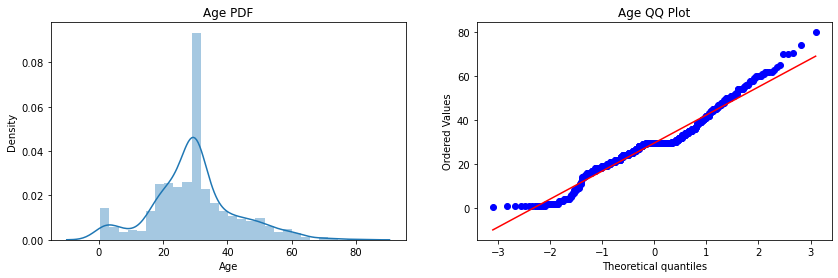

In [190]:
# checking distribution of Age data
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()

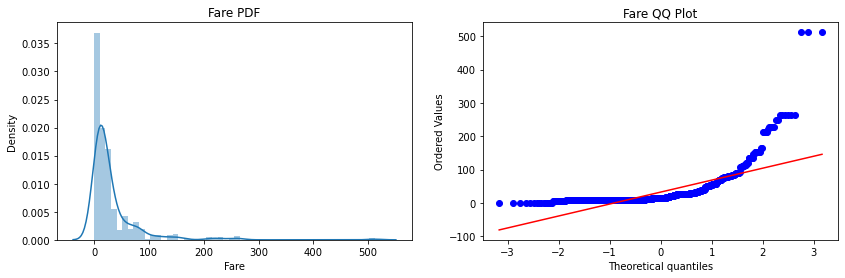

In [191]:
# checking distribution of Fare data
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(titanic['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(titanic['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

### Model Accuracy Before transforming train and test data

In [192]:
# creating model objects
modelLR = LogisticRegression()
modelDT = DecisionTreeClassifier()

# fit
modelLR.fit(X_train, y_train)
modelDT.fit(X_train, y_train)

# predict
y_predLR = modelLR.predict(X_test)
y_predDT = modelDT.predict(X_test)

# accuracy
print("Accuracy with LR: ", accuracy_score(y_test, y_predLR))
print("Accuracy with DT: ", accuracy_score(y_test, y_predDT))

Accuracy with LR:  0.6480446927374302
Accuracy with DT:  0.664804469273743


### Model Accuracy After transforming train and test data

In [193]:
# transformer object
trf = FunctionTransformer(func=np.log1p) # if there are no zeroes in data then you can use logp instead of log1p

# fit and transform train data and transform test data
X_train_trans = trf.fit_transform(X_train)
X_test_trans = trf.transform(X_test)

# creating model objects
modelLR = LogisticRegression()
modelDT = DecisionTreeClassifier()

# fit 
modelLR.fit(X_train_trans, y_train)
modelDT.fit(X_train_trans, y_train)

# predict
y_predLR = modelLR.predict(X_test_trans)
y_predDT = modelDT.predict(X_test_trans)

# accuracy
print("LR Accuracy: ", accuracy_score(y_test, y_predLR))
print("DT Accuracy: ", accuracy_score(y_test, y_predDT))

LR Accuracy:  0.6815642458100558
DT Accuracy:  0.6871508379888268


### Cross Validating to make sure the prediction is accurate

In [194]:
X_trans = trf.fit_transform(X)

modelLR = LogisticRegression()
modelDT = DecisionTreeClassifier()

print("LR Accuracy: ", np.mean(cross_val_score(modelLR, X_trans, y, scoring='accuracy', cv=10)))
print("DT Accuracy: ", np.mean(cross_val_score(modelDT, X_trans, y, scoring='accuracy', cv=10)))

LR Accuracy:  0.678027465667915
DT Accuracy:  0.6610861423220974


### Comparing data distribution before and after transformation

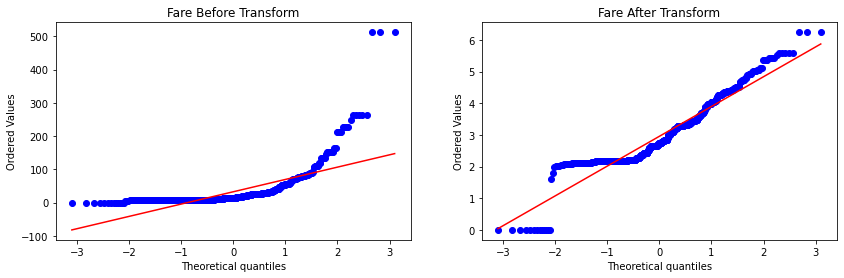

In [195]:
# plotting GG plots for fare data 
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Before Transform')

plt.subplot(122)
stats.probplot(X_train_trans['Fare'], dist='norm', plot=plt)
plt.title('Fare After Transform')

plt.show()

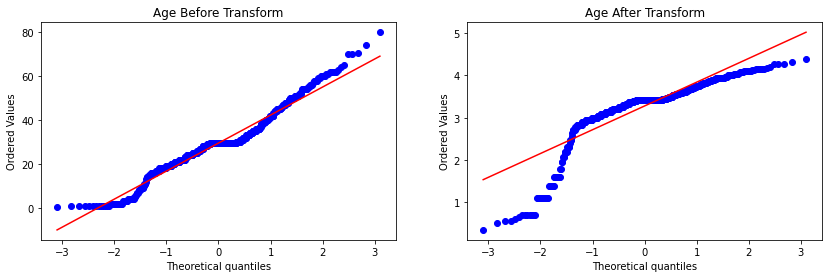

In [196]:
# plotting GG plot for Age
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age Before Transform')

plt.subplot(122)
stats.probplot(X_train_trans['Age'], dist='norm', plot=plt)
plt.title('Age After Transform')

plt.show()

### Observation

It can be seen after transforming Fare data, the distribution has come closer to linear. <br>
But after transforming Age data, the distribution rather became worst than before. <br>
So, we will now transform only Fare data in next few steps.


__Transforming only 'Fare' data__

In [197]:
# tranform object
trf = ColumnTransformer([('logTrans', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

# transform 
X_train_trans = trf.fit_transform(X_train)
X_test_trans = trf.transform(X_test)

# model objects
modelLR = LogisticRegression()
modelDT = DecisionTreeClassifier()

# fit 
modelLR.fit(X_train_trans, y_train)
modelDT.fit(X_train_trans, y_train)

# predict
y_predLR = modelLR.predict(X_test_trans)
y_predDT = modelDT.predict(X_test_trans)

# accuracy
print("LR Accuracy: ", accuracy_score(y_test, y_predLR))
print("DT Accuracy: ", accuracy_score(y_test, y_predDT))

LR Accuracy:  0.6703910614525139
DT Accuracy:  0.664804469273743


In [198]:
# I have created a function to use different transforms, to calculate accuracy and gives QQ plot before and after transformation
def apply_transform(transform):
    
    # splitting data into train test
    X = titanic.iloc[:, 1:3]
    y = titanic.iloc[:,0]

    # tranform object
    trf = ColumnTransformer([('logTrans', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')
    
    # trasform input
    X_trans = trf.fit_transform(X)
    
    # model object
    modelLR = LogisticRegression()
    
    # cross validate
    print("LR Accuracy: ", np.mean(cross_val_score(modelLR, X_trans, y, scoring='accuracy', cv=10)))
    
    # plotting GG plots for fare data 
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist='norm', plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist='norm', plot=plt)
    plt.title('Fare After Transform')

    plt.show()

LR Accuracy:  0.6589013732833957


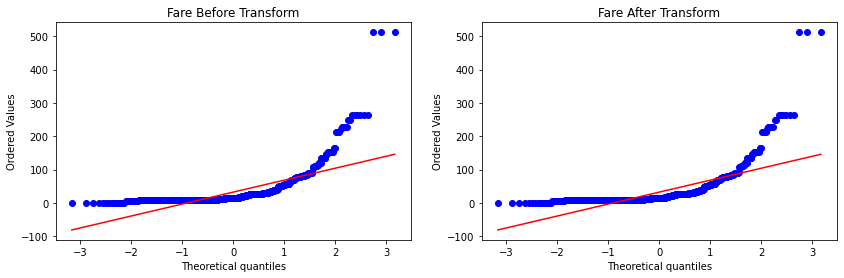

In [199]:
# without transformation
apply_transform(lambda x: x)

LR Accuracy:  0.6150561797752809


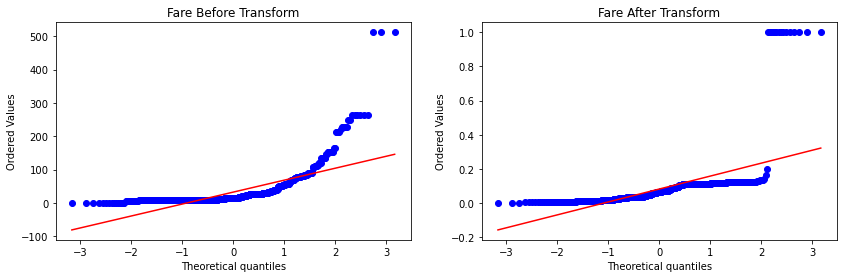

In [200]:
# reciprocal transform
apply_transform(lambda x: 1/(x+1))

# here for reciprocal instear of 1/x I had to give 1/(x+1) because there are zeroes in the fare column. 
# denominator cannot be zero

LR Accuracy:  0.6442446941323345


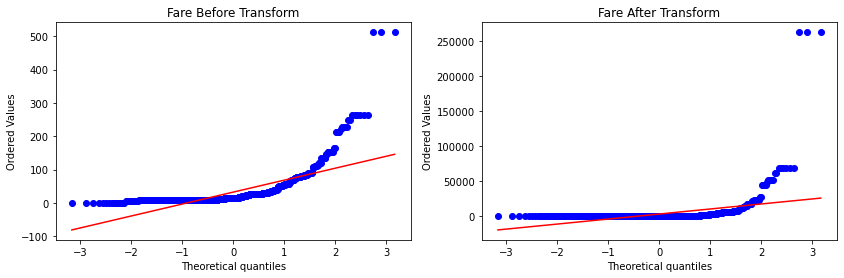

In [201]:
# square transform
apply_transform(lambda x: x**2)

LR Accuracy:  0.6589013732833957


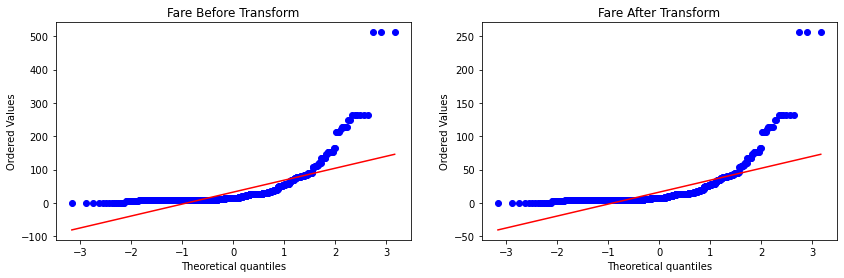

In [202]:
# squareroot transform
apply_transform(lambda x: x**1/2)

LR Accuracy:  0.6195131086142323


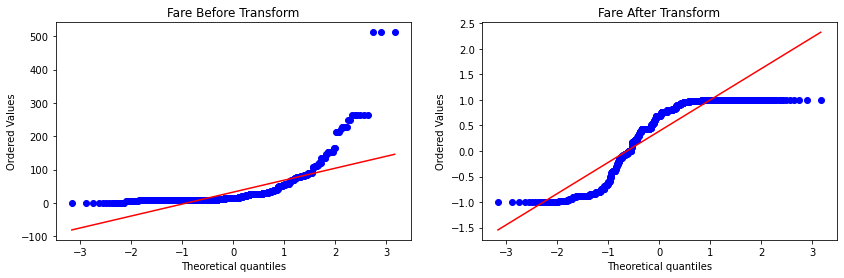

In [203]:
# you can use custom functions like this to see data distribution
apply_transform(np.sin)

## Summary

From the above analysis it can be observed that log transorm ia best for this dataset